<a href="https://colab.research.google.com/github/Lannn21/W6Datamining/blob/main/Maulana_0706022210057_Week6_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAULANA MAHATIR-0706022210057**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Lannn21/W6Datamining/refs/heads/main/Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [5]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


**VISUALISASI**

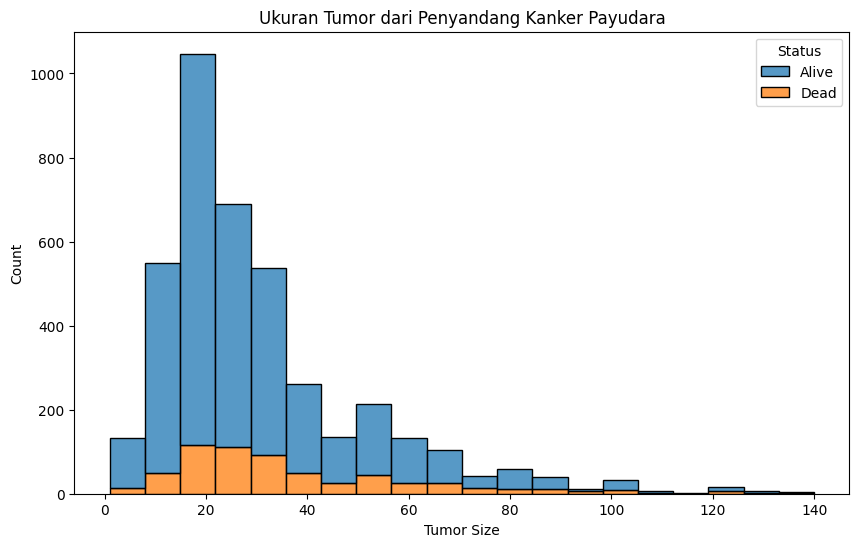

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tumor Size', hue='Status', multiple='stack', bins=20)
plt.title("Ukuran Tumor dari Penyandang Kanker Payudara")
plt.xlabel("Tumor Size")
plt.ylabel("Count")
plt.show()

Menampilkan grafik dari ukuran besar Tumor pada penyandang Kanker Payudara

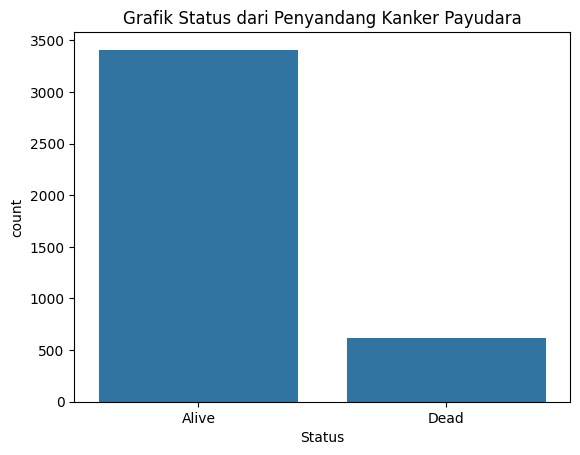

In [12]:
sns.countplot(data=df, x='Status')
plt.title("Grafik Status dari Penyandang Kanker Payudara")
plt.show()

Menampilkan Grafik dari status akhir penyandang Kanker apakah selamat atau meninggal

**ENCODING**

In [17]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**SPLIT DATASET**

In [18]:
X = df.drop("Status", axis=1)
y = df["Status"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**DECISION TREE**

In [20]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [21]:
y_pred_en = clf_en.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9114


In [23]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8942
Test set score: 0.9114


[Text(0.5, 0.875, 'x[14] <= -1.045\nentropy = 0.626\nsamples = 2816\nvalue = [2375, 441]'),
 Text(0.25, 0.625, 'x[0] <= 0.86\nentropy = 0.866\nsamples = 337\nvalue = [97.0, 240.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[11] <= -0.842\nentropy = 0.954\nsamples = 246\nvalue = [92, 154]'),
 Text(0.0625, 0.125, 'entropy = 0.617\nsamples = 85\nvalue = [13.0, 72.0]'),
 Text(0.1875, 0.125, 'entropy = 1.0\nsamples = 161\nvalue = [79, 82]'),
 Text(0.375, 0.375, 'x[14] <= -1.439\nentropy = 0.307\nsamples = 91\nvalue = [5, 86]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 60\nvalue = [0, 60]'),
 Text(0.4375, 0.125, 'entropy = 0.637\nsamples = 31\nvalue = [5, 26]'),
 Text(0.75, 0.625, 'x[13] <= -0.135\nentropy = 0.406\nsamples = 2479\nvalue = [2278, 201]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 0.571\nentropy = 0.304\nsamples = 1714\nvalue = [1621, 93]'),
 Text(0.5625, 0.125, 'entropy = 0.227\nsamples = 1307\nvalue = [1259, 48]'),
 Text(0.6875, 0.125, 'ent

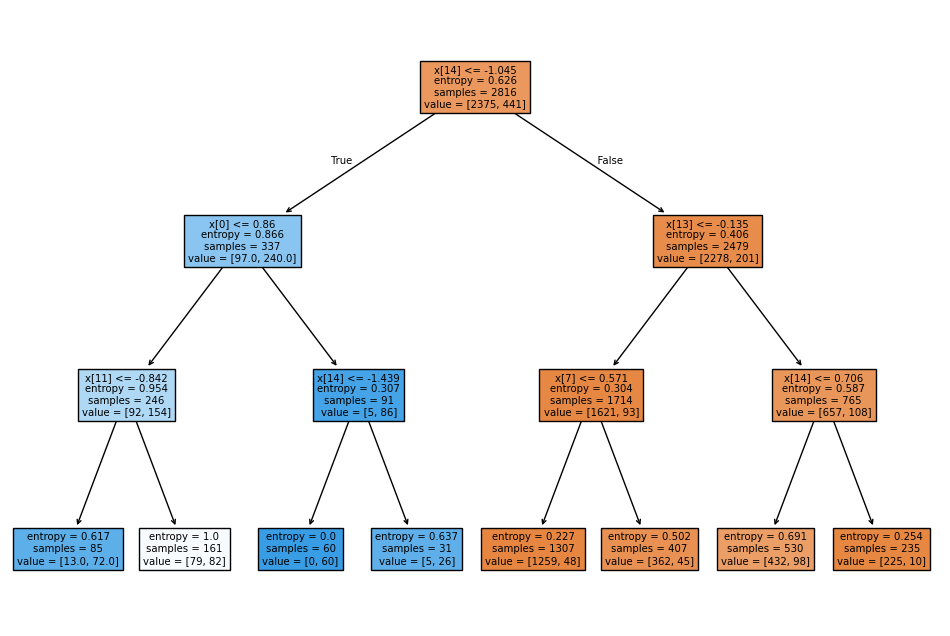

In [24]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True)

**LOGISTIC REGRESSION**

In [25]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1033
           1       0.78      0.46      0.58       175

    accuracy                           0.90      1208
   macro avg       0.85      0.72      0.76      1208
weighted avg       0.90      0.90      0.89      1208



In [26]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9031456953642384


**KNN**

In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)


In [28]:
print("K-Nearest Neighbors Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Performance
Accuracy: 0.8725165562913907
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1033
           1       0.63      0.29      0.40       175

    accuracy                           0.87      1208
   macro avg       0.76      0.63      0.66      1208
weighted avg       0.85      0.87      0.85      1208



Dari tiga hasil tersebut bisa disimpulkan bahwa model yang menampilkan hasil paling akurat adalah Decision Tree dengan tingkat akurasi 91.14% diikuti oleh Logistic Regression dengan tingkat akurasi 90.31%, lalu terakhir adalah KNN dengan tingkat akurasi 87.25%. Bisa disimpulkan untuk kasus ini model analisi yang paling baik untuk digunakan adalah Decision Tree.